In [4]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering 
import matplotlib.pyplot as plt


## Data

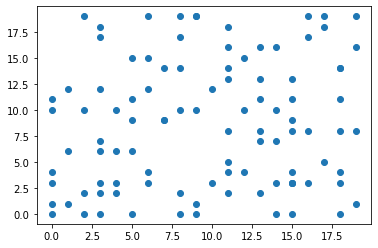

In [8]:
np.random.seed(0)
data = np.random.randint(0,20, (100,2))
plt.scatter(data[:,0], data[:,1])

## K-MEAN

In [9]:
kmean = KMeans(n_clusters=4)

In [10]:
kmean.fit(data)

KMeans(n_clusters=4)

In [11]:
kmean.cluster_centers_

array([[ 5.42307692, 13.53846154],
       [14.67857143,  4.39285714],
       [14.68181818, 14.68181818],
       [ 3.70833333,  2.58333333]])

In [12]:
kmean.labels_

array([2, 3, 3, 0, 1, 0, 3, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 3, 3, 1, 2,
       3, 3, 3, 0, 1, 0, 3, 0, 3, 2, 1, 1, 2, 1, 3, 1, 1, 0, 1, 2, 2, 0,
       3, 3, 2, 3, 1, 0, 2, 0, 0, 2, 3, 3, 2, 0, 2, 3, 0, 1, 1, 2, 3, 0,
       2, 1, 1, 3, 2, 1, 0, 3, 0, 1, 3, 2, 2, 2, 2, 1, 3, 3, 1, 1, 1, 2,
       0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 1, 0])

In [13]:
df = pd.DataFrame(columns = ['x','y','label'])
df['x'] = data[:,0]
df['y'] = data[:,1]
df['label'] = kmean.labels_

In [14]:
df

,x,y,label
0,12,15,2
1,0,3,3
2,3,7,3
3,9,19,0
4,18,4,1
...,...,...,...
95,0,11,0
96,8,10,0
97,11,5,1
98,15,8,1


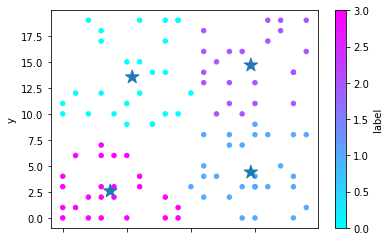

In [21]:
df.plot(kind = 'scatter', x = 'x', y = 'y', c = 'label', cmap = 'cool')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1], marker='*', s = [200,200,200,200])

## DBSCAN

In [30]:
dbscan = DBSCAN(eps=2, min_samples=5)

In [31]:
dbscan.fit(data)

DBSCAN(eps=2)

In [32]:
dbscan.labels_

array([ 7, -1,  3,  6, -1, -1,  3, -1, -1,  0,  6, -1, -1, -1,  2, -1, -1,
        0,  1, -1,  4,  7,  1, -1,  3,  6,  2, -1,  1,  5,  3,  7, -1,  2,
        0,  4, -1,  2,  4, -1,  2,  0, -1,  5,  1, -1, -1,  1,  2, -1,  7,
        5, -1, -1,  1,  1, -1, -1, -1, -1,  5,  0,  4, -1,  1,  6,  0, -1,
        2,  1, -1,  0,  6, -1, -1, -1,  1,  0,  0,  7, -1, -1, -1,  3,  0,
        0, -1,  0, -1, -1, -1,  2, -1,  1,  5, -1, -1,  4,  0, -1],
      dtype=int64)

In [33]:
df['label_DB'] = dbscan.labels_
df

,x,y,label,label_DB
0,12,15,2,7
1,0,3,3,-1
2,3,7,3,3
3,9,19,0,6
4,18,4,1,-1
...,...,...,...,...
95,0,11,0,-1
96,8,10,0,-1
97,11,5,1,4
98,15,8,1,0


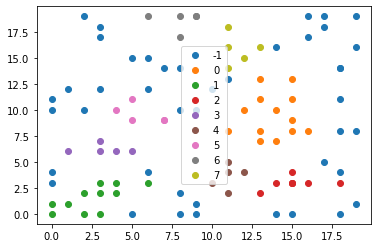

In [34]:
groups = df.groupby('label_DB')
for name,group in groups:
    plt.plot(group["x"], group["y"], marker = "o", linestyle ="", label = name)
plt.legend()

## AgglomerativeClustering 

In [38]:
Agg = AgglomerativeClustering (n_clusters=4)

In [39]:
Agg.fit(data)

AgglomerativeClustering(n_clusters=4)

In [40]:
Agg.labels_

array([1, 2, 2, 0, 3, 0, 2, 0, 3, 1, 0, 1, 0, 3, 3, 1, 1, 1, 2, 3, 3, 0,
       2, 2, 2, 0, 3, 0, 2, 0, 2, 1, 3, 3, 1, 3, 2, 3, 3, 0, 3, 1, 1, 0,
       2, 2, 1, 2, 3, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 3, 0, 1, 3, 1, 2, 0,
       1, 1, 3, 2, 1, 1, 0, 3, 0, 3, 2, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1,
       0, 0, 0, 3, 1, 2, 0, 0, 0, 3, 1, 0], dtype=int64)

C:\Users\NapatCota\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


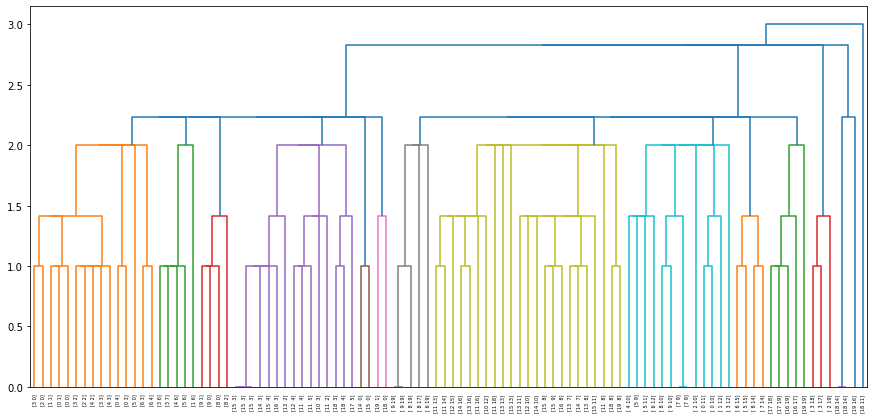

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data, 'single')
label_list = data
plt.figure(figsize=(15,7))
dendrogram(linked, orientation= 'top', labels= label_list, distance_sort= 'descending', show_leaf_counts= True)
plt.show()

In [42]:
int(1.6)

1

In [43]:
nums = [1,2,3,4,5,6,7,8,9,10]

x = 0

res = []

while (x < 10):
    if nums[x]%2 == 0:
        res.append(nums[x])
    x = x+1

print(res)

[2, 4, 6, 8, 10]


0